In [3]:
import pandas as pd
import os

In [10]:
english_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_train.csv'))
english_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\english_validation.csv'))

df_english = pd.concat([english_train, english_validation], ignore_index=True)

malayalam_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_train.csv'))
malayalam_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'Data\malayalam_validation.csv'))

df_malayalam = pd.concat([malayalam_train, malayalam_validation], ignore_index=True)

tamil_train = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_train.csv'))
tamil_validation = pd.read_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'Data\tamil_validation.csv'))

df_tamil = pd.concat([tamil_train, tamil_validation], ignore_index=True)

## Tokenize

In [53]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

english_stop_words = set(stopwords.words('english'))

def tokenize(tweet, remove_stopwords=False):
    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(tweet)
    if remove_stopwords:
        tokens = [w for w in tokens if not w in english_stop_words]
    return tokens

In [30]:
df_english['tokens_without_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_english['tokens_with_stopwords'] = df_english['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [ ]:
# from indicnlp import common
# from indicnlp import loader
# from indicnlp.tokenize import indic_tokenize

# # git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git

# # The path to the local git repo for Indic NLP Resources
# INDIC_NLP_RESOURCES = r"D:\Desktop\ML Group Project\indic_nlp_resources"

# # Export the path to the Indic NLP Resources directory programmatically
# common.set_resources_path(INDIC_NLP_RESOURCES)

# # Initialize the Indic NLP library
# loader.load()

In [24]:
# tamil_stop_words = []
# with open('TamilStopWords.txt', encoding="utf8") as f:
#     for line in f:
#         tamil_stop_words.append(line.strip())

# def tokenize_tamil(tweet, remove_stopwords=False):
#     tokens = indic_tokenize.trivial_tokenize(tweet)
#     if remove_stopwords:
#         tokens = [w for w in tokens if not w in tamil_stop_words]
#     return tokens

# df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=True))
# df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize_tamil(x, remove_stopwords=False))

In [31]:
df_tamil['tokens_without_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_tamil['tokens_with_stopwords'] = df_tamil['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [32]:
df_malayalam['tokens_without_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_malayalam['tokens_with_stopwords'] = df_malayalam['text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [51]:
df_english['Word Count without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: len(x))
df_english['Character Count'] = df_english['text'].apply(lambda x: len(x))
df_english['Average Word Length without Stopwords'] = df_english['Character Count'] / df_english['Word Count without Stopwords']
df_english['Word Count with Stopwords'] = df_english['tokens_with_stopwords'].apply(lambda x: len(x))
df_english['Average Word Length with Stopwords'] = df_english['Character Count'] / df_english['Word Count with Stopwords']
df_english['Text without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: ' '.join(x))

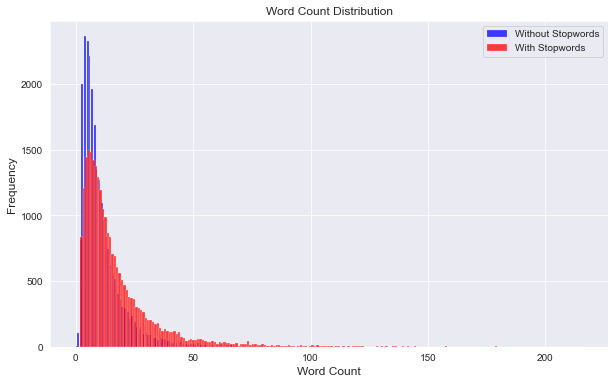

In [48]:
# Histogram of Word Count without Stopwords and with Stopwords on same plot
import matplotlib.pyplot as plt
import seaborn as sns
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Word Count without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Word Count with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Word Count Distribution', fontsize=12)
ax.set_xlabel('Word Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

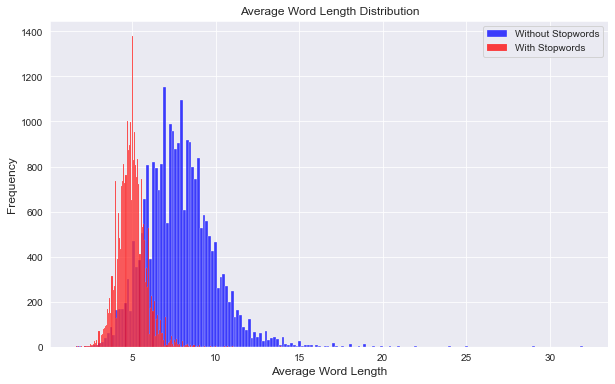

In [49]:
# Histogram of Average Word Length without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Average Word Length without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Average Word Length with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Average Word Length Distribution', fontsize=12)
ax.set_xlabel('Average Word Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

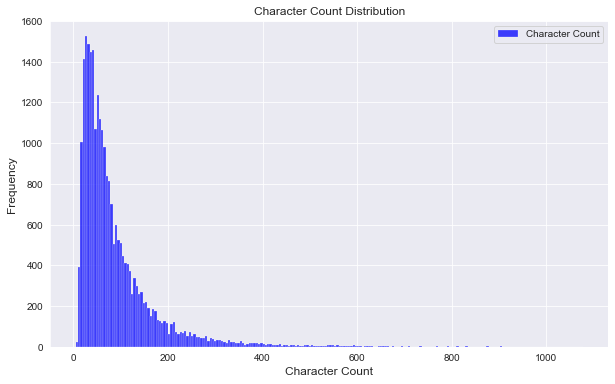

In [50]:
# Histogram of character count
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Character Count'], color='blue', label='Character Count', ax=ax)
# set title and labels
ax.set_title('Character Count Distribution', fontsize=12)
ax.set_xlabel('Character Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [54]:
corpus_without_stopwords = ' '.join(df_english['Text without Stopwords'])
corpus_without_stopwords = corpus_without_stopwords.split()

corpus_with_stopwords = ' '.join(df_english['text'])
corpus_with_stopwords = corpus_with_stopwords.split()

# create a dictionary of words and their frequency

def create_dictionary(corpus):
    word_freq = {}
    for word in corpus:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

word_freq_without_stopwords = create_dictionary(corpus_without_stopwords)
word_freq_with_stopwords = create_dictionary(corpus_with_stopwords)
# get stop word frequency
stop_word_freq = {}
for word in english_stop_words:
    if word in word_freq_with_stopwords.keys():
        stop_word_freq[word] = word_freq_with_stopwords[word]

In [56]:
# sort the dictionary by values
sorted_stop_word_freq = sorted(stop_word_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_with_stopwords = sorted(word_freq_with_stopwords.items(), key=lambda x: x[1], reverse=True)
word_freq_without_stopwords = sorted(word_freq_without_stopwords.items(), key=lambda x: x[1], reverse=True)

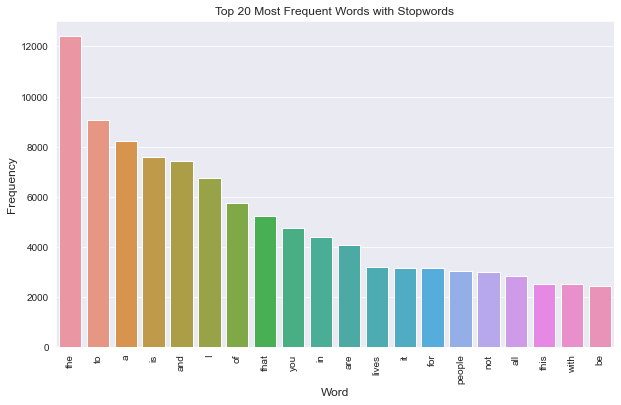

In [57]:
# plot the top 20 most frequent words
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_with_stopwords[:20]], y=[x[1] for x in word_freq_with_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words with Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

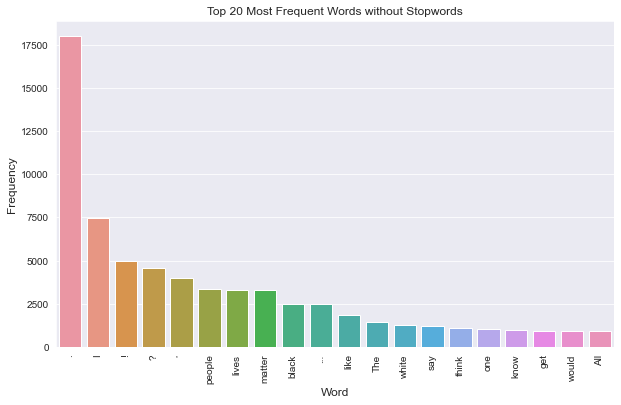

In [58]:
# plot the top 20 most frequent words without stopwords
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_without_stopwords[:20]], y=[x[1] for x in word_freq_without_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words without Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()